# Crypto Price Analysis and Visualization

## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes= "Tre")

## Access Data
Here I select BTC, ETH, BNB, Doge, XRP based on market capitalization and my personal preferences.   
Data ia taken from https://www.investing.com/ and is free to use.

In [26]:
Dataset = pd.read_csv("C:/Users/arthu/CryptoData.csv",encoding='utf-8')
Dataset

,Date,Bitcoin,Ethereum,Binance Coin,Ripple,Dogecoin
0,2018-01-01,13444.9,752.5,8.45,2.05,0.00868
1,2018-01-02,14754.1,858.8,8.72,2.19,0.00900
2,2018-01-03,15156.6,942.0,9.30,2.73,0.00921
3,2018-01-04,15180.1,940.0,9.14,2.73,0.00961
4,2018-01-05,16954.8,962.8,14.88,2.51,0.01255
...,...,...,...,...,...,...
2064,2023-08-27,26100.6,1658.3,218.30,0.52,0.06318
2065,2023-08-28,26118.9,1653.2,218.80,0.52,0.06345
2066,2023-08-29,27723.9,1729.7,226.90,0.54,0.06641
2067,2023-08-30,27298.8,1705.2,223.80,0.53,0.06589


## Data Exploration

In [27]:
#Reset Index
Dataset.rename(columns = {"Bitcoin":"BTC", "Ethereum":"ETH", "Binance Coin":"BNB", "Ripple":"XRP", "Dogecoin":"Doge"},inplace = True)
Dataset.index = Dataset.index+1
# Dataset.index = Dataset["Date"]
# Dataset = Dataset.drop("Date",axis =1)
Dataset

,Date,BTC,ETH,BNB,XRP,Doge
1,2018-01-01,13444.9,752.5,8.45,2.05,0.00868
2,2018-01-02,14754.1,858.8,8.72,2.19,0.00900
3,2018-01-03,15156.6,942.0,9.30,2.73,0.00921
4,2018-01-04,15180.1,940.0,9.14,2.73,0.00961
5,2018-01-05,16954.8,962.8,14.88,2.51,0.01255
...,...,...,...,...,...,...
2065,2023-08-27,26100.6,1658.3,218.30,0.52,0.06318
2066,2023-08-28,26118.9,1653.2,218.80,0.52,0.06345
2067,2023-08-29,27723.9,1729.7,226.90,0.54,0.06641
2068,2023-08-30,27298.8,1705.2,223.80,0.53,0.06589


In [28]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 1 to 2069
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2069 non-null   object 
 1   BTC     2069 non-null   float64
 2   ETH     2069 non-null   float64
 3   BNB     2069 non-null   float64
 4   XRP     2069 non-null   float64
 5   Doge    2069 non-null   float64
dtypes: float64(5), object(1)
memory usage: 97.1+ KB


In [29]:
Dataset.isnull().sum()

Date    0
BTC     0
ETH     0
BNB     0
XRP     0
Doge    0
dtype: int64

In [30]:
Dataset.describe()

,BTC,ETH,BNB,XRP,Doge
count,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,21029.996617,1217.192122,166.546100,0.515587,0.063881
std,16115.006698,1145.742857,178.395731,0.327539,0.093049
min,3228.700000,83.800000,4.520000,0.140000,0.001590
25%,8157.200000,221.800000,15.600000,0.300000,0.002680
50%,15043.000000,785.200000,31.310000,0.410000,0.005910
75%,30346.400000,1849.800000,306.600000,0.630000,0.081840
max,67527.900000,4808.400000,676.560000,2.780000,0.686880


## Price Trend and Distribution Visualization

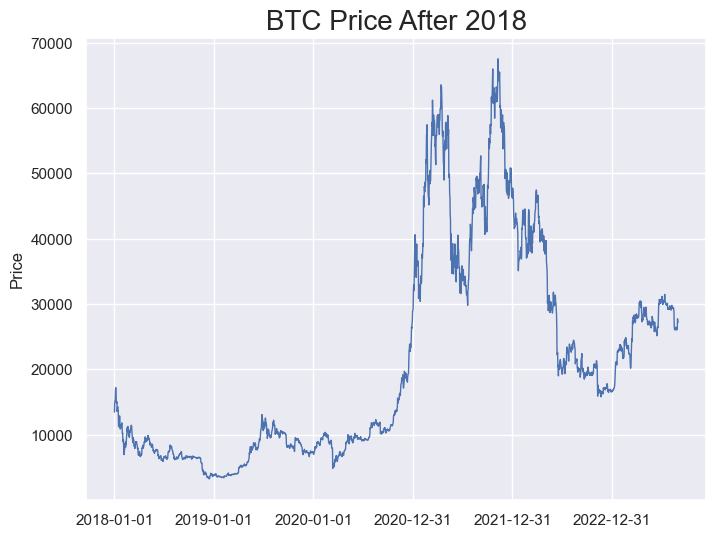

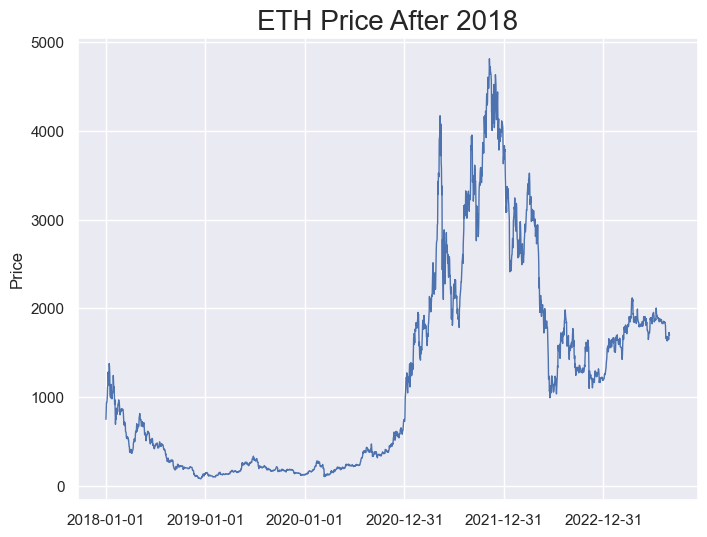

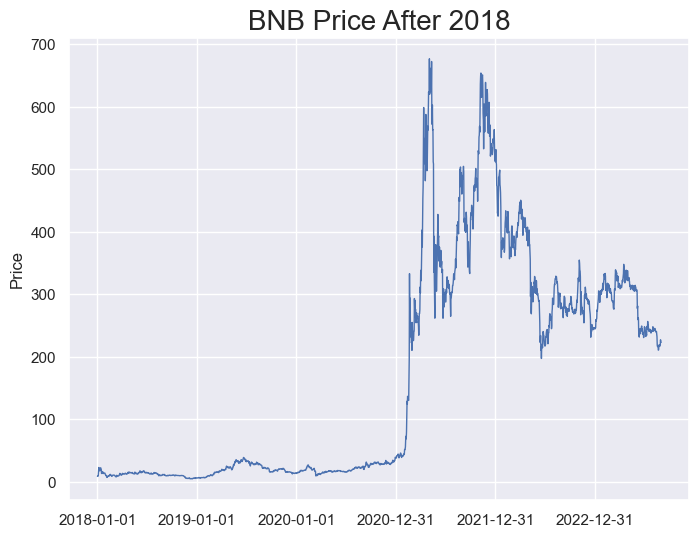

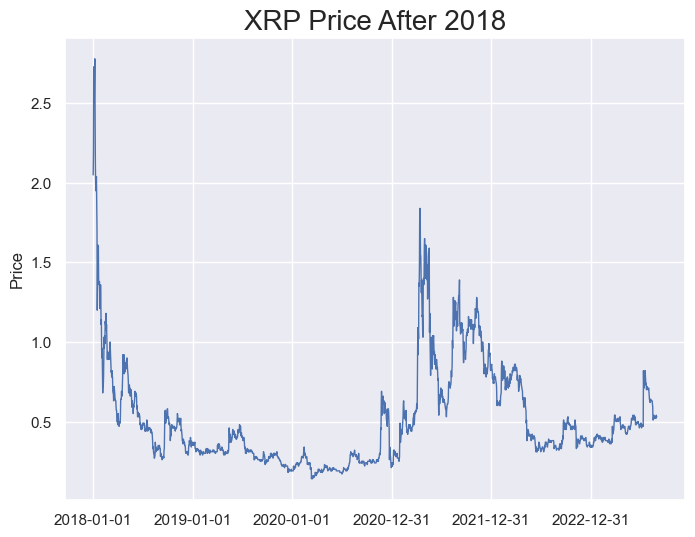

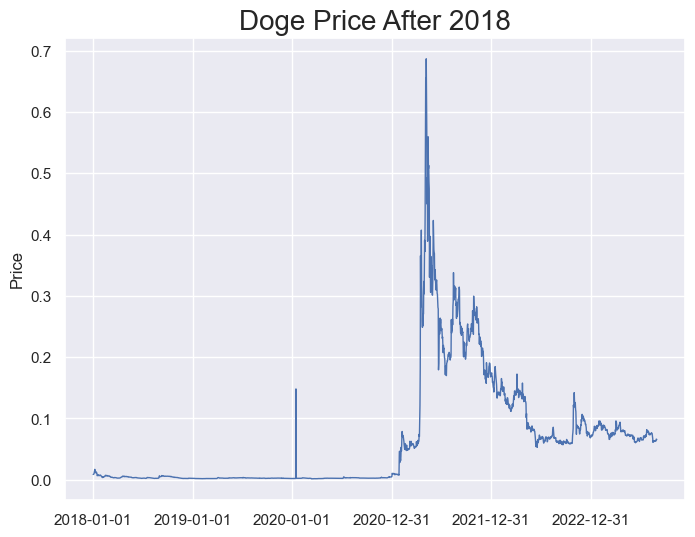

In [31]:
Datatype = ["BTC", "ETH", "BNB", "XRP","Doge"]
for Type in Datatype:
    plt.figure(figsize=(8,6))
    plt.title(f"{Type} Price After 2018", fontsize = 20)
    plt.plot(Dataset["Date"], Dataset[Type],linewidth=1,)
    plt.ylabel("Price")
    plt.xticks(Dataset.Date[::365])


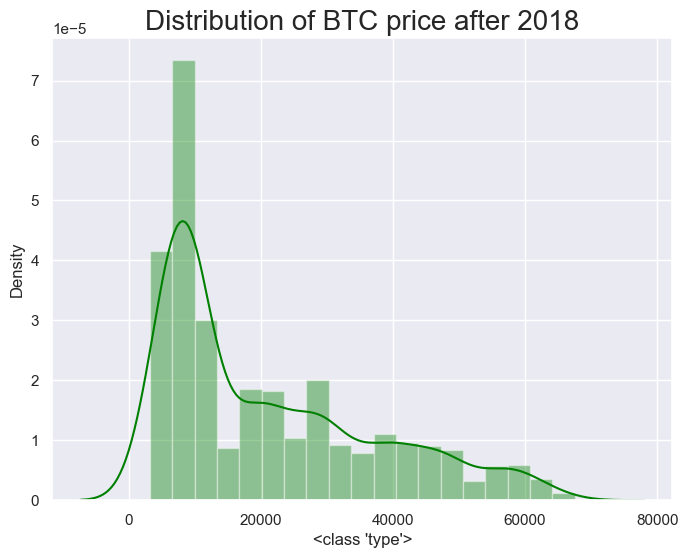

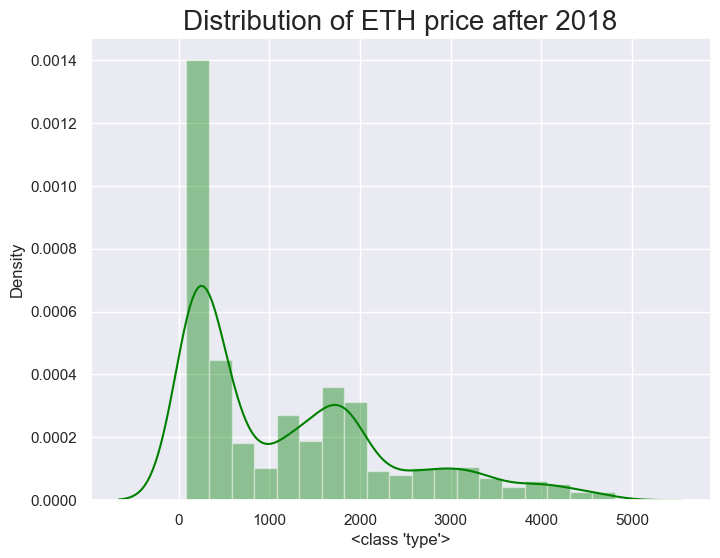

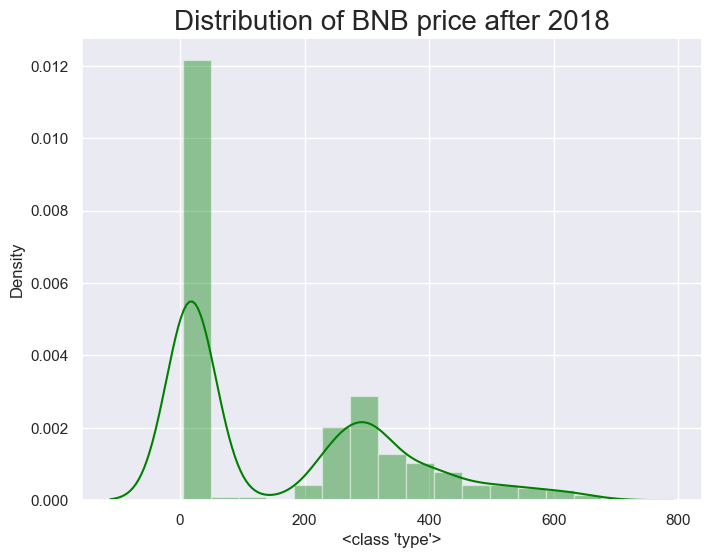

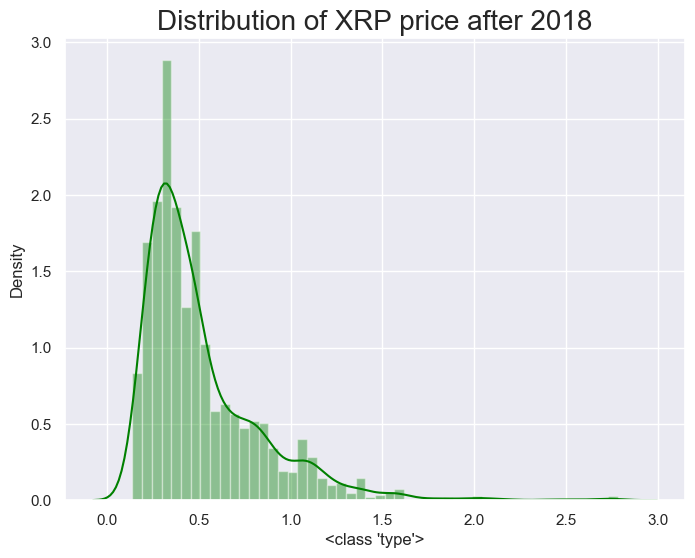

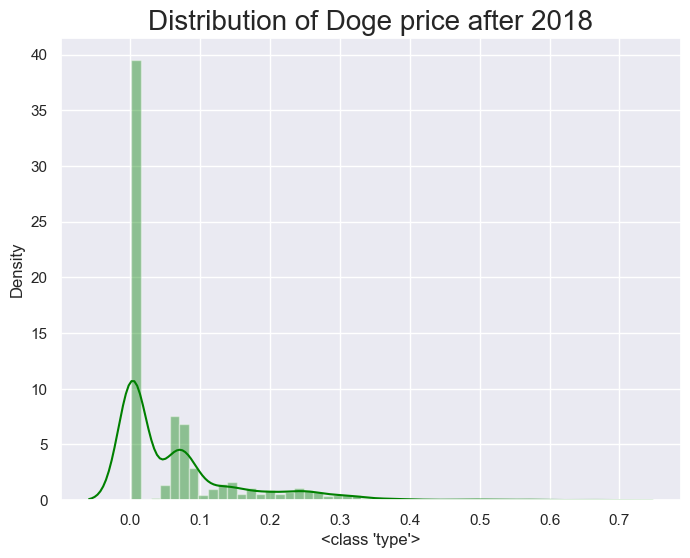

In [32]:
#Distribution of the price
for Type in Datatype:
    plt.figure(figsize=(8,6))
    plt.title(f"Distribution of {Type} price after 2018", fontsize=20)
    sns.distplot(Dataset[Type], color="green")
    plt.xlabel(type)
    plt.show()

## The correlation of 5 crypto price movements.

<AxesSubplot:title={'center':'Correlation of 5 Crypto price movements after 2018'}>

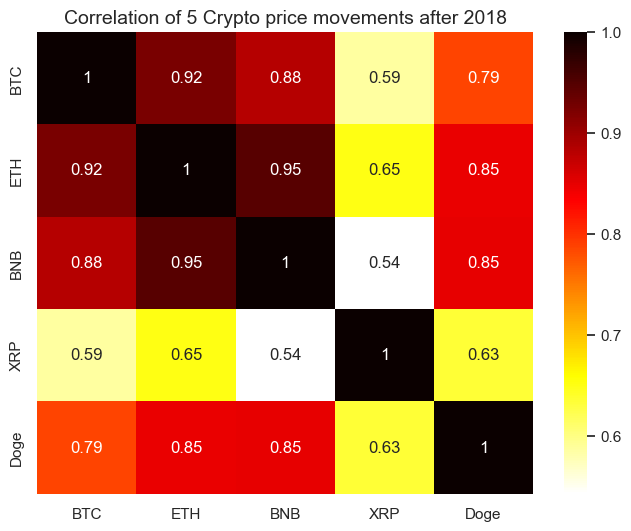

In [33]:
Corr=Dataset.corr()
plt.figure(figsize=(8,6))
plt.title("Correlation of 5 Crypto price movements after 2018", fontsize =14)
sns.heatmap(Corr, cmap="hot_r", annot=True )

BTC is highly corr with ETH during the given period.

<Figure size 800x600 with 0 Axes>

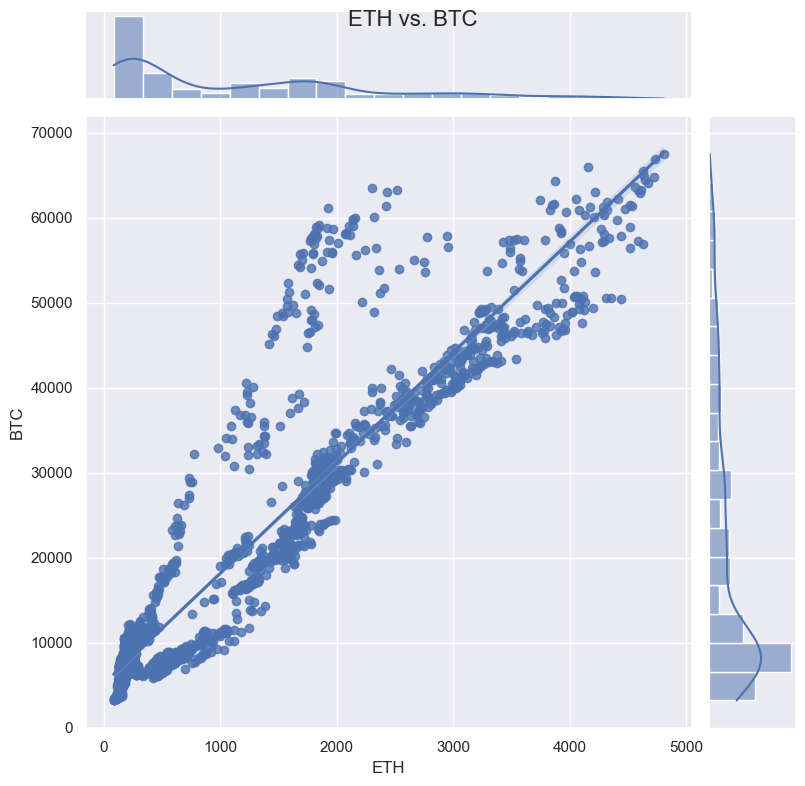

<Figure size 800x600 with 0 Axes>

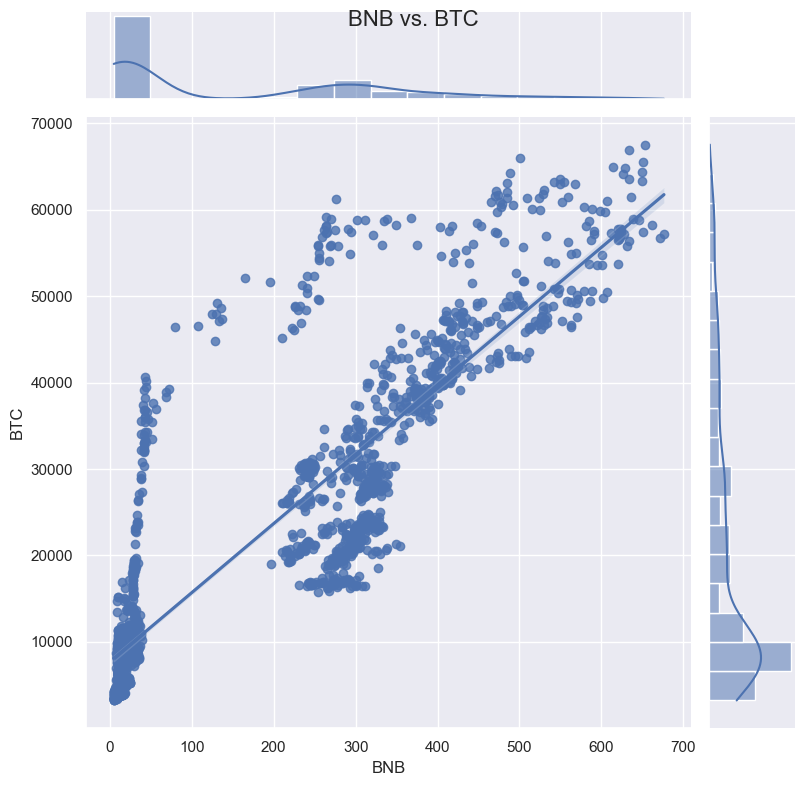

<Figure size 800x600 with 0 Axes>

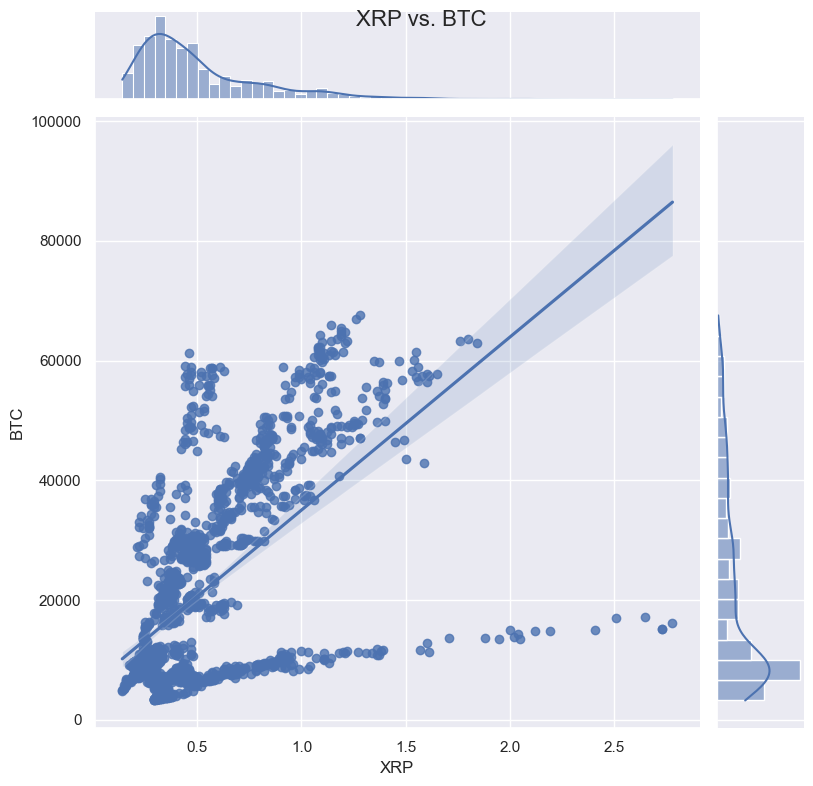

<Figure size 800x600 with 0 Axes>

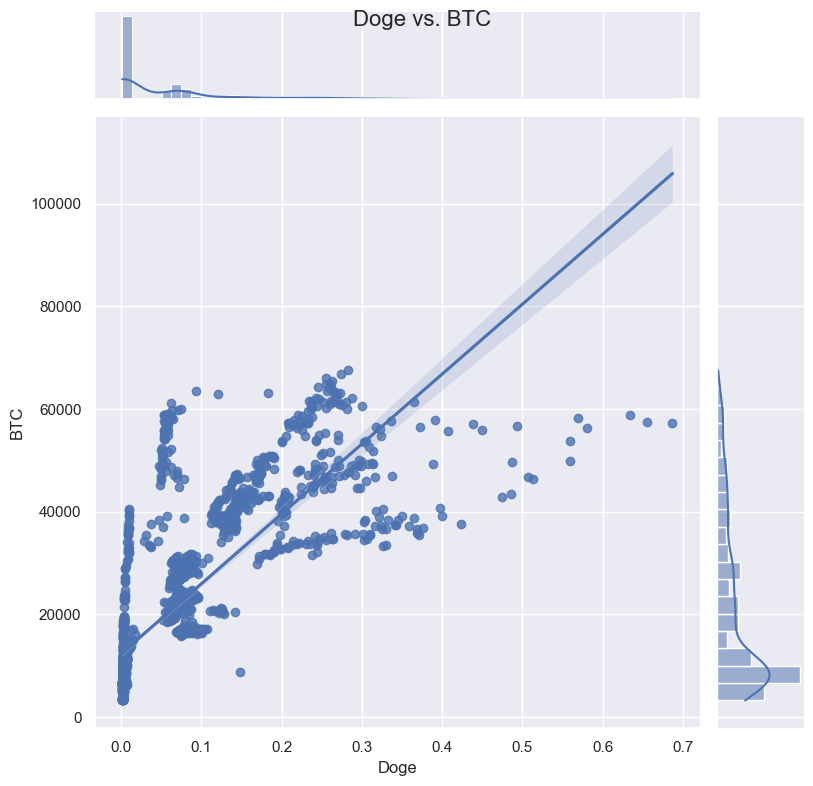

In [34]:
#We take BTC as a standard to plot the graph
#The Shadow Area of Linear Regrssion Line is confidence interval
Datatype2 = ["ETH", "BNB", "XRP","Doge"]
for Type in Datatype2:
    plt.figure(figsize=(8,6))
    sns.jointplot(x=Dataset[Type], y=Dataset["BTC"], kind = "reg", height= 8, ratio= 6)
    plt.suptitle(f"{Type} vs. BTC", fontsize=16)
    plt.xlabel(type)
    plt.ylabel("BTC")
    plt.show()


## Daily Return and Cumulative Return

In [35]:
#Caculate the Daily Volatility (Daily Return)
for Data in Datatype: 
    Dataset[f"{Data} Vol"] = Dataset[Data].pct_change(1) 
    if Data in Datatype:
        Dataset.drop(columns=[Data], inplace=True)
        Dataset = Dataset.fillna(int("0"))

Dataset

,Date,BTC Vol,ETH Vol,BNB Vol,XRP Vol,Doge Vol
1,2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2,2018-01-02,0.097375,0.141262,0.031953,0.068293,0.036866
3,2018-01-03,0.027281,0.096879,0.066514,0.246575,0.023333
4,2018-01-04,0.001550,-0.002123,-0.017204,0.000000,0.043431
5,2018-01-05,0.116910,0.024255,0.628009,-0.080586,0.305931
...,...,...,...,...,...,...
2065,2023-08-27,0.003209,0.006800,0.008314,0.000000,0.004611
2066,2023-08-28,0.000701,-0.003075,0.002290,0.000000,0.004274
2067,2023-08-29,0.061450,0.046274,0.037020,0.038462,0.046651
2068,2023-08-30,-0.015333,-0.014164,-0.013662,-0.018519,-0.007830


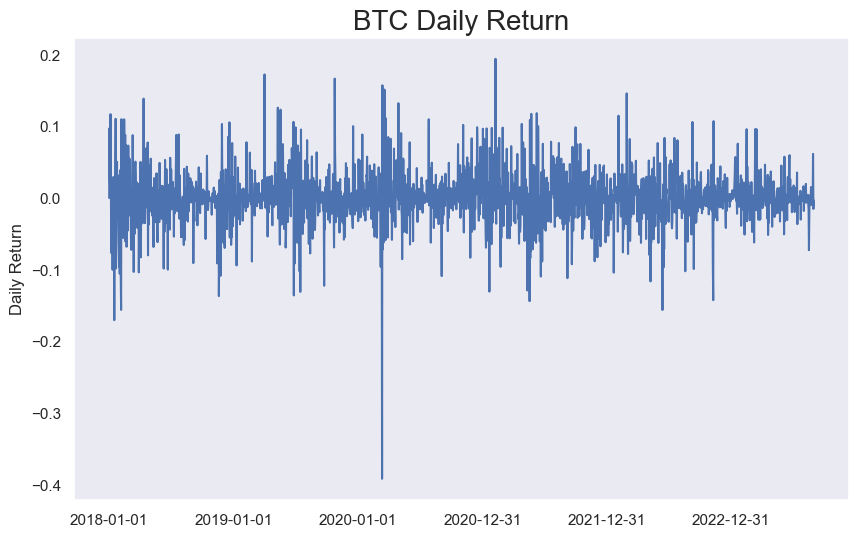

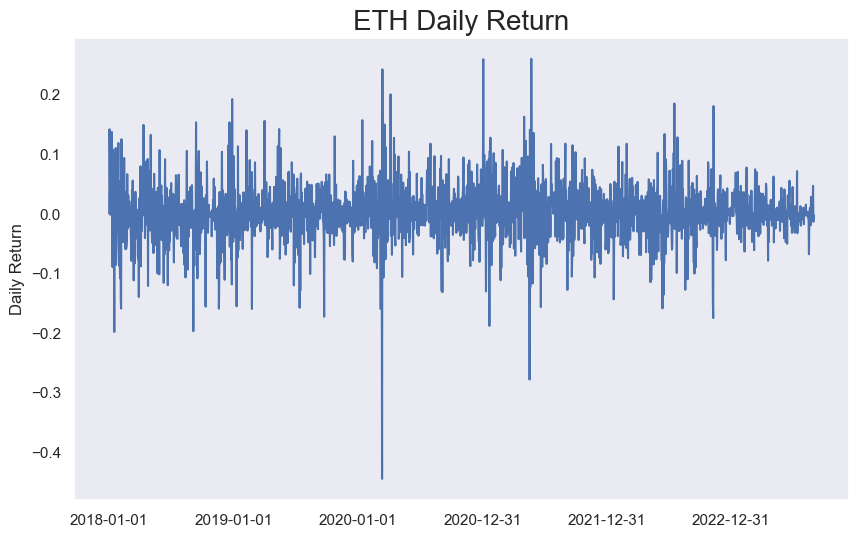

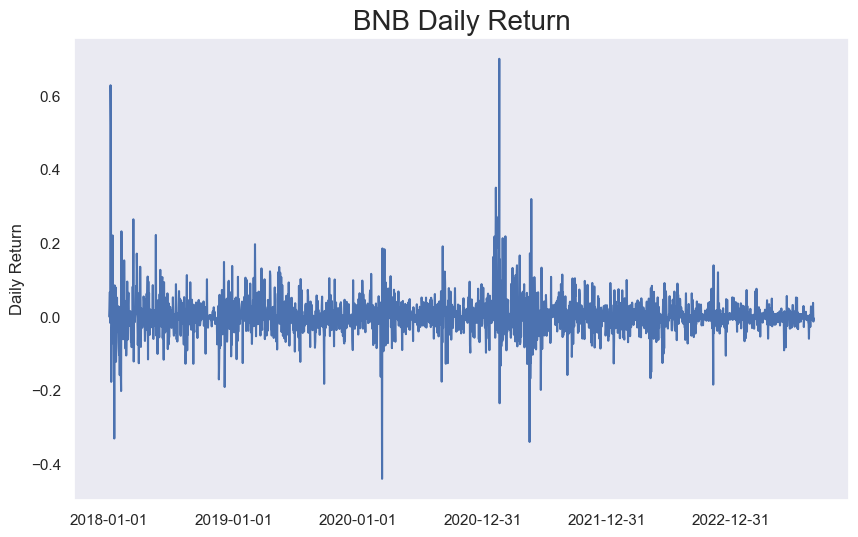

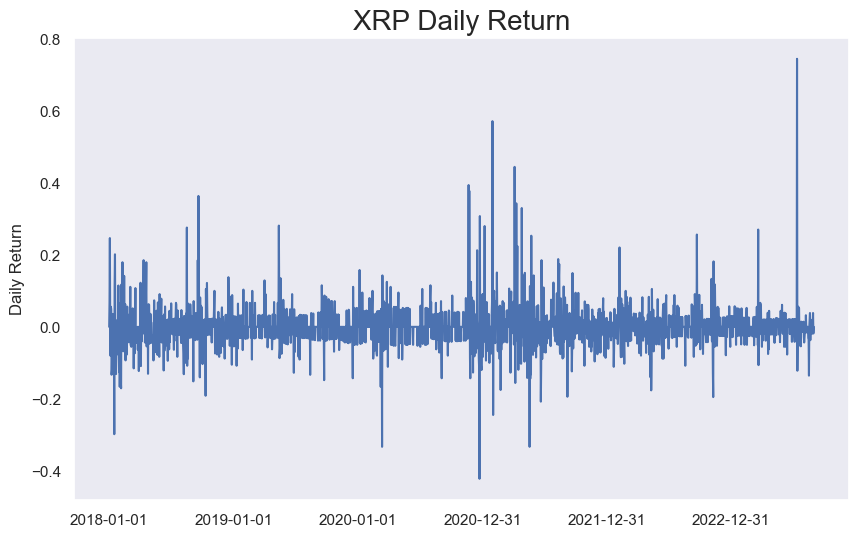

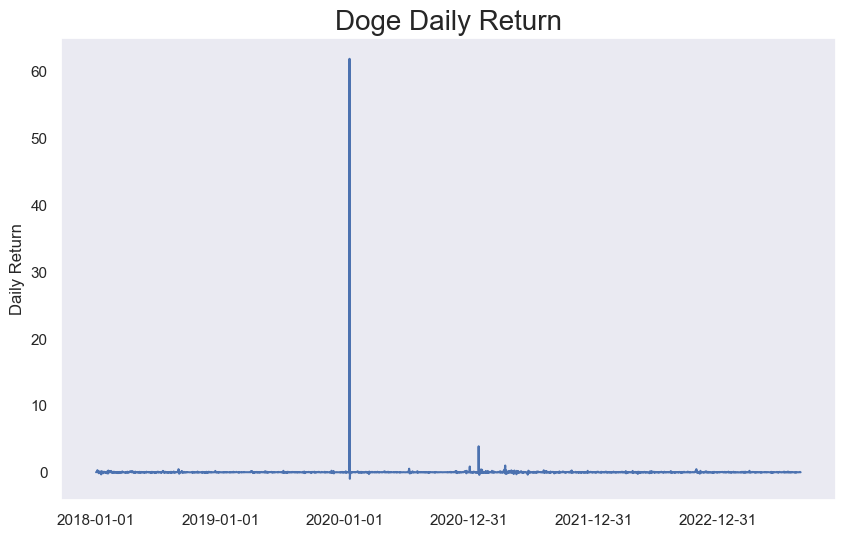

In [36]:
for Type in Datatype: 
    plt.figure(figsize=(10,6))
    plt.title(f"{Type} Daily Return",fontsize="20")
    plt.plot(Dataset["Date"], Dataset[f"{Type} Vol"])
    plt.ylabel("Daily Return")
    plt.xticks(Dataset.Date[::365])
    plt.grid()
    plt.show()

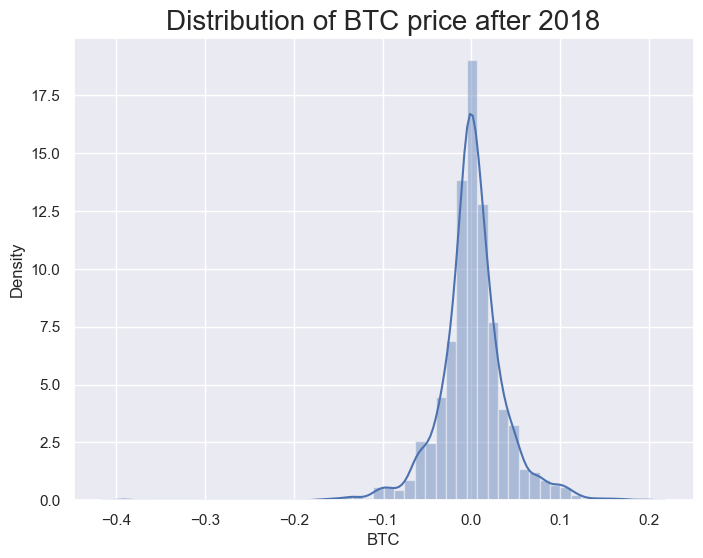

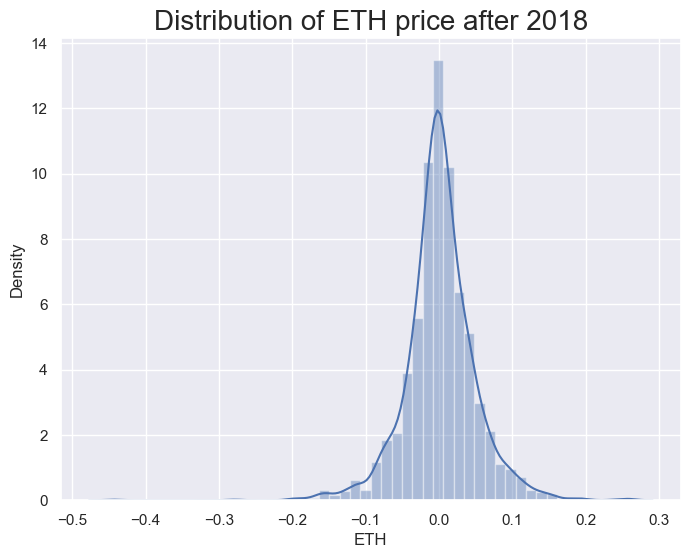

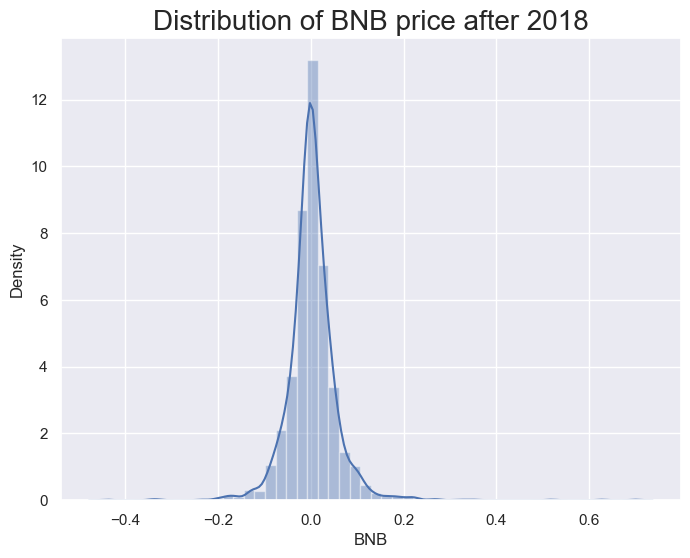

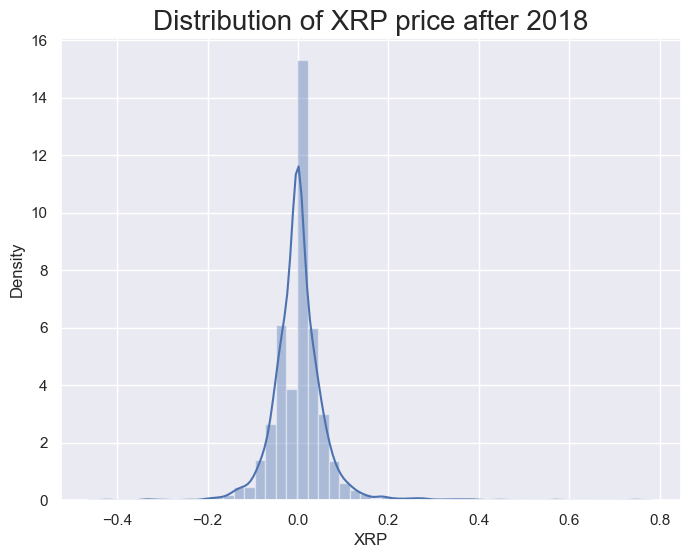

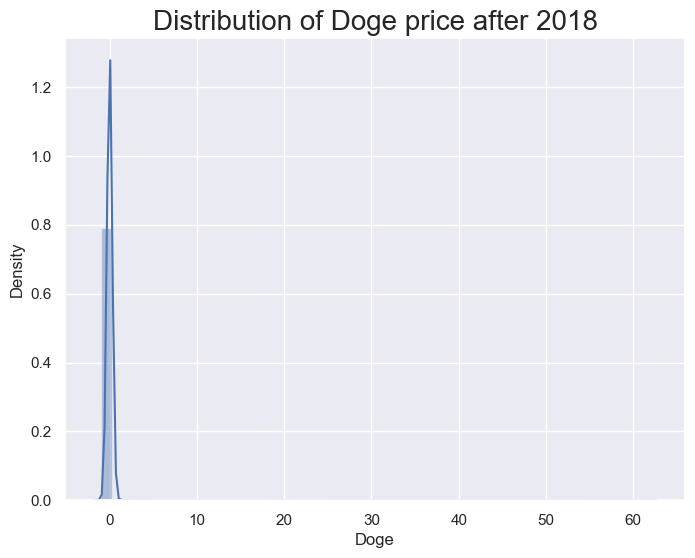

In [37]:
#Distribution of Daily Return:
for Type in Datatype:
    plt.figure(figsize=(8,6))
    plt.title(f"Distribution of {Type} price after 2018", fontsize=20)
    sns.distplot(Dataset[(f"{Type} Vol")])
    plt.xlabel(Type)
    plt.show()

In [38]:
#Caculate the Cumulative Return and convert output data into a percentage format
for Type in Datatype: 
    Dataset[f"{Type} CumRet"] = (1+Dataset[f"{Type} Vol"]).cumprod() 
    Dataset.drop([f"{Type} Vol"],axis=1, inplace=True)
Cols_to_convert = Dataset.columns.difference(["Date"'"])
Dataset[Cols_to_convert] = (Dataset[Cols_to_convert] * 100).round(2).astype(str) + '%'
Dataset

,Date,BTC CumRet,ETH CumRet,BNB CumRet,XRP CumRet,Doge CumRet
1,2018-01-01,100.0%,100.0%,100.0%,100.0%,100.0%
2,2018-01-02,109.74%,114.13%,103.2%,106.83%,103.69%
3,2018-01-03,112.73%,125.18%,110.06%,133.17%,106.11%
4,2018-01-04,112.91%,124.92%,108.17%,133.17%,110.71%
5,2018-01-05,126.11%,127.95%,176.09%,122.44%,144.59%
...,...,...,...,...,...,...
2065,2023-08-27,194.13%,220.37%,2583.43%,25.37%,727.88%
2066,2023-08-28,194.27%,219.69%,2589.35%,25.37%,730.99%
2067,2023-08-29,206.2%,229.86%,2685.21%,26.34%,765.09%
2068,2023-08-30,203.04%,226.6%,2648.52%,25.85%,759.1%
